# Python Implementation of Gaussian Naive Bayes

## 1. Importing Libraries


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## 2. Loading the Dataset and Preparing Features and Target Variable

In [2]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

X = data.drop("Species", axis=1)
y = data['Species']

## 3. Encoding and Splitting the Dataset

In [3]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Creating and Training the Model

In [4]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


## 5. Plotting 1D Gaussian Distributions for All Features

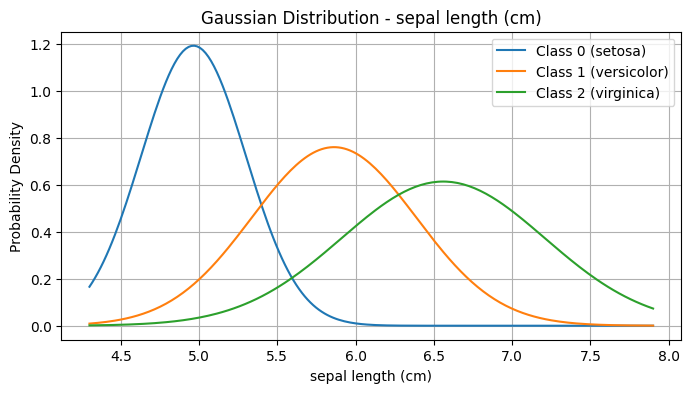

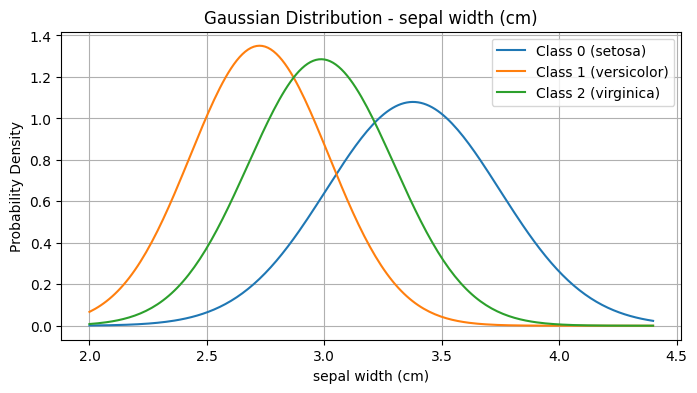

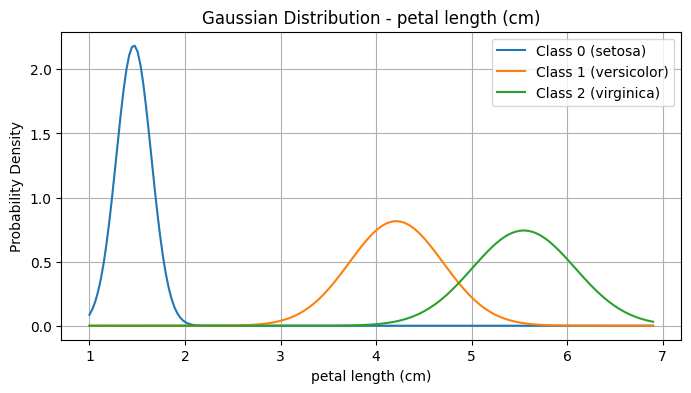

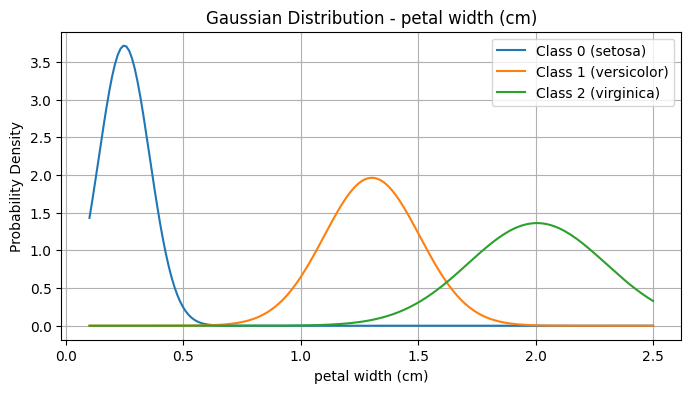

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

feature_names = iris.feature_names
num_features = len(feature_names)
num_classes = len(np.unique(y))

X_np = X.to_numpy() 

for feature_index in range(num_features):
    feature_name = feature_names[feature_index]
    x_vals = np.linspace(X_np[:, feature_index].min(), X_np[:, feature_index].max(), 200)

    plt.figure(figsize=(8, 4))

    for cls in range(num_classes):
        mean = gnb.theta_[cls, feature_index]
        std = np.sqrt(gnb.var_[cls, feature_index])
        y_vals = norm.pdf(x_vals, mean, std)
        plt.plot(x_vals, y_vals, label=f"Class {cls} ({iris.target_names[cls]})")

    plt.title(f"Gaussian Distribution - {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

    plt.show()

## 6. Making Predictions

In [7]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction on Iris Flower is: {accuracy}")

The Accuracy of Prediction on Iris Flower is: 0.9777777777777777


## The End !!